#**1. Introduction**

According to the National Association of Realtors, of the 75% of contracts with settlement contingencies, 41% involved appraisal issues.

In addition, according to the Realtors Confidence Index Survey, 21% of realtors say appraisal issues delayed their sales contracts in October 2020. As a result, appraisal issues led to 13% of contracts being terminated. 

**Problem:** An inaccurate appraisal can lead to a cancelled sales contract and transaction delays because lenders won’t approve mortgages for more than the home’s value.

**Solution:** the solution will be to create a model that can accurately predict the estimated market value of each home and serve as a second opinon to compare with the appraiser's value.

This price estimate should help you protect against the appraiser’s mistake and obtain accurate home prices based on market data.  


---


# **2. Data**

The original dataset is called House Prices - Advanced Regression Techniques and was downloaded from Kaggle website: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv). 

The data contains variables describing the aspect of residential homes. It contains 11460 observations and 81 variables.

**Load the Dataset**

In [ ]:
# Import the relevant libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import tree
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the raw data from the source into a DataFrame

df = pd.read_csv("https://storage.googleapis.com/kagglesdsdata/competitions/5407/868283/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1613856414&Signature=or%2BKUIzchS0DIeWN02Pse3cXfdZUJtwJG8Ye2QoKCESlgdnPUiIlo%2BFhHVvhIaKe5rijMab7Wkvt8D6ynyWjDHNyBpLCLFj36LY4SDo2hrtA4WTMk3c7t%2FCyaRxEBObRpsQcvQAT3lTVPz3GGpGYYX4mw%2FQQ4J%2BBlxSSwiAnsYyetKBwpuT2aZXNzLNiJdn%2FTXA5omhK4tD3DMriL7j%2B7MICQoLJ%2FWXDvVBDbQ5YQOXYrRZTzaB%2Fx1RN8da5Pn7GjNpqmdRRcFp5zdnrOTXZzfe0LRW6ItB5hoZKwqdSNRLnd%2B2sHFNEvh5F3U78A7cpzIsVS3uoZnPJqAhiwin%2FfQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv")

---

#**3. Methodology**

###**Data Cleaning**

In this step, I will eliminate any problems from the dataset which would prevent further analysis.

In [ ]:
# Use the info() function to get an understanding of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

It can be seen from the output that this dataset contains 1460 observations and 81 variables. 

There are some missing values. 

Moreover, 35 fields are integers, 43 are objects (strings) and 3 are float. The essential difference between these variable types is that continuous variables can take a potentially unlimited number of values, while categorical variables can take only a limited number of categories as their values.

In [ ]:
# Print the first 5 rows of the DataFrame

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Detecting Missing Values**

In [ ]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = df.isnull().sum()*100/df.isnull().count()

missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=["Total", "Percent"])

missing_data.head(25)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


It can be seen that 19 variables contain missing values.

**Handling Missing Values**

PoolQC, MiscFeature, Alley and Fence variables have 80% or more missing values. I will delete these variables from the dataset.

LotFrontage, GarageYrBlt and MasVnrArea are continuos variables (can take an unlimited number of different values). I will fill LotFrontage and MasVnrArea missing values with the mean and mode respectively (missing value imputation); and I will delete GarageYrBlt variable. 

For all categorical variables that contain missing values, I will replace their missing values with their most common category.  






In [ ]:
df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mode()[0])

df.drop(["GarageYrBlt"],axis=1,inplace=True)

df["FireplaceQu"] = df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])

df["GarageCond"] = df["GarageCond"].fillna(df["GarageCond"].mode()[0])

df["GarageType"] = df["GarageType"].fillna(df["GarageType"].mode()[0])

df["GarageFinish"] = df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])

df["GarageQual"] = df["GarageQual"].fillna(df["GarageQual"].mode()[0])

df["BsmtExposure"] = df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0])

df["BsmtFinType2"] = df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])

df["BsmtFinType1"] = df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])

df["BsmtCond"] = df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])

df["BsmtQual"] = df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])

df["MasVnrType"] = df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])

df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

df.drop(["Id"],axis=1,inplace=True)

In [ ]:
df.shape

(1460, 75)

In [ ]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = df.isnull().sum()*100/df.isnull().count()

missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=["Total", "Percent"])

missing_data.head(25)

,Total,Percent
SalePrice,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


###**Data Exploration**

In this step, I will apply statistics and visualization techniques to gain a better understanding of the dataset.

In [ ]:
# Get univariate statistics to 
# summarize the central tendency, dispersion, 
# and shape of a dataset’s distribution

df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Identify numerical variables in the dataset

numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
The number of numerical columns is 36


In [ ]:
# Identify non-numerical variables in the dataset

non_numeric_columns = df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
The number of non-numerical columns is 39


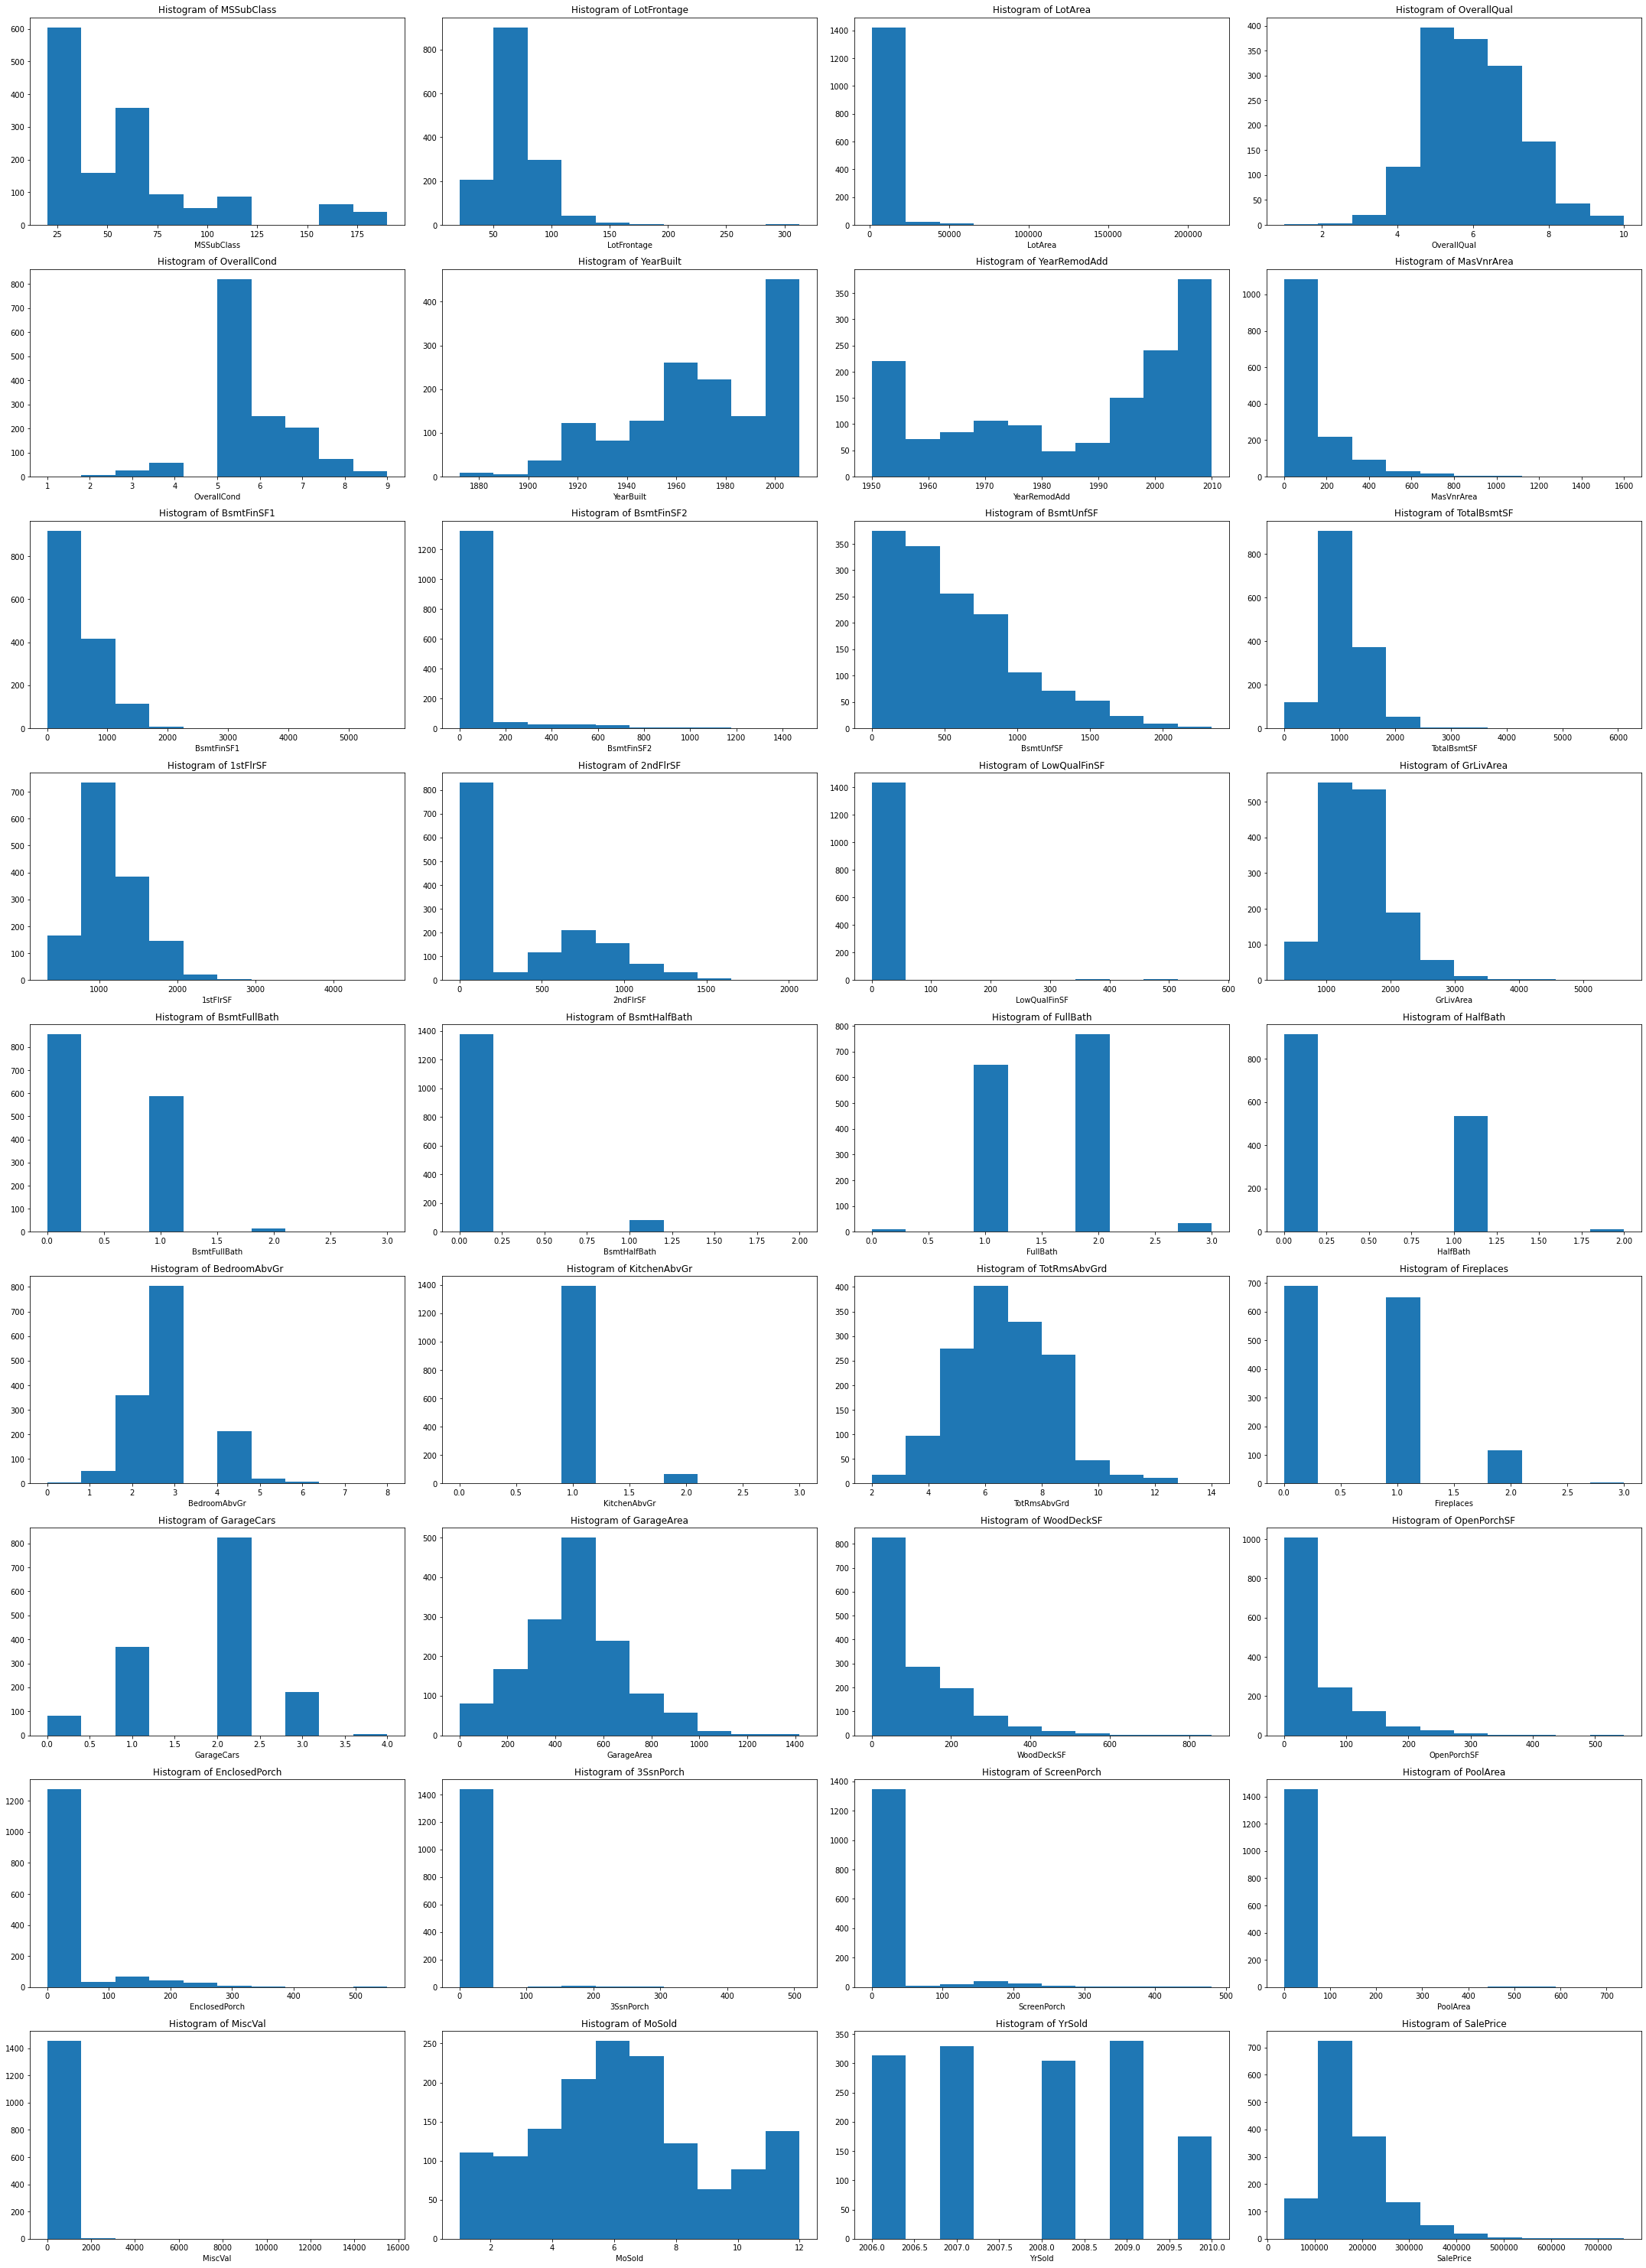

In [ ]:
# Univariate visualization of the continuous variables 
# to get a sense of their distribution

plt.figure(figsize=(30,50))

for index, column in enumerate(numeric_columns):
    plt.subplot(11,4,index+1)
    plt.hist(df[column])
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

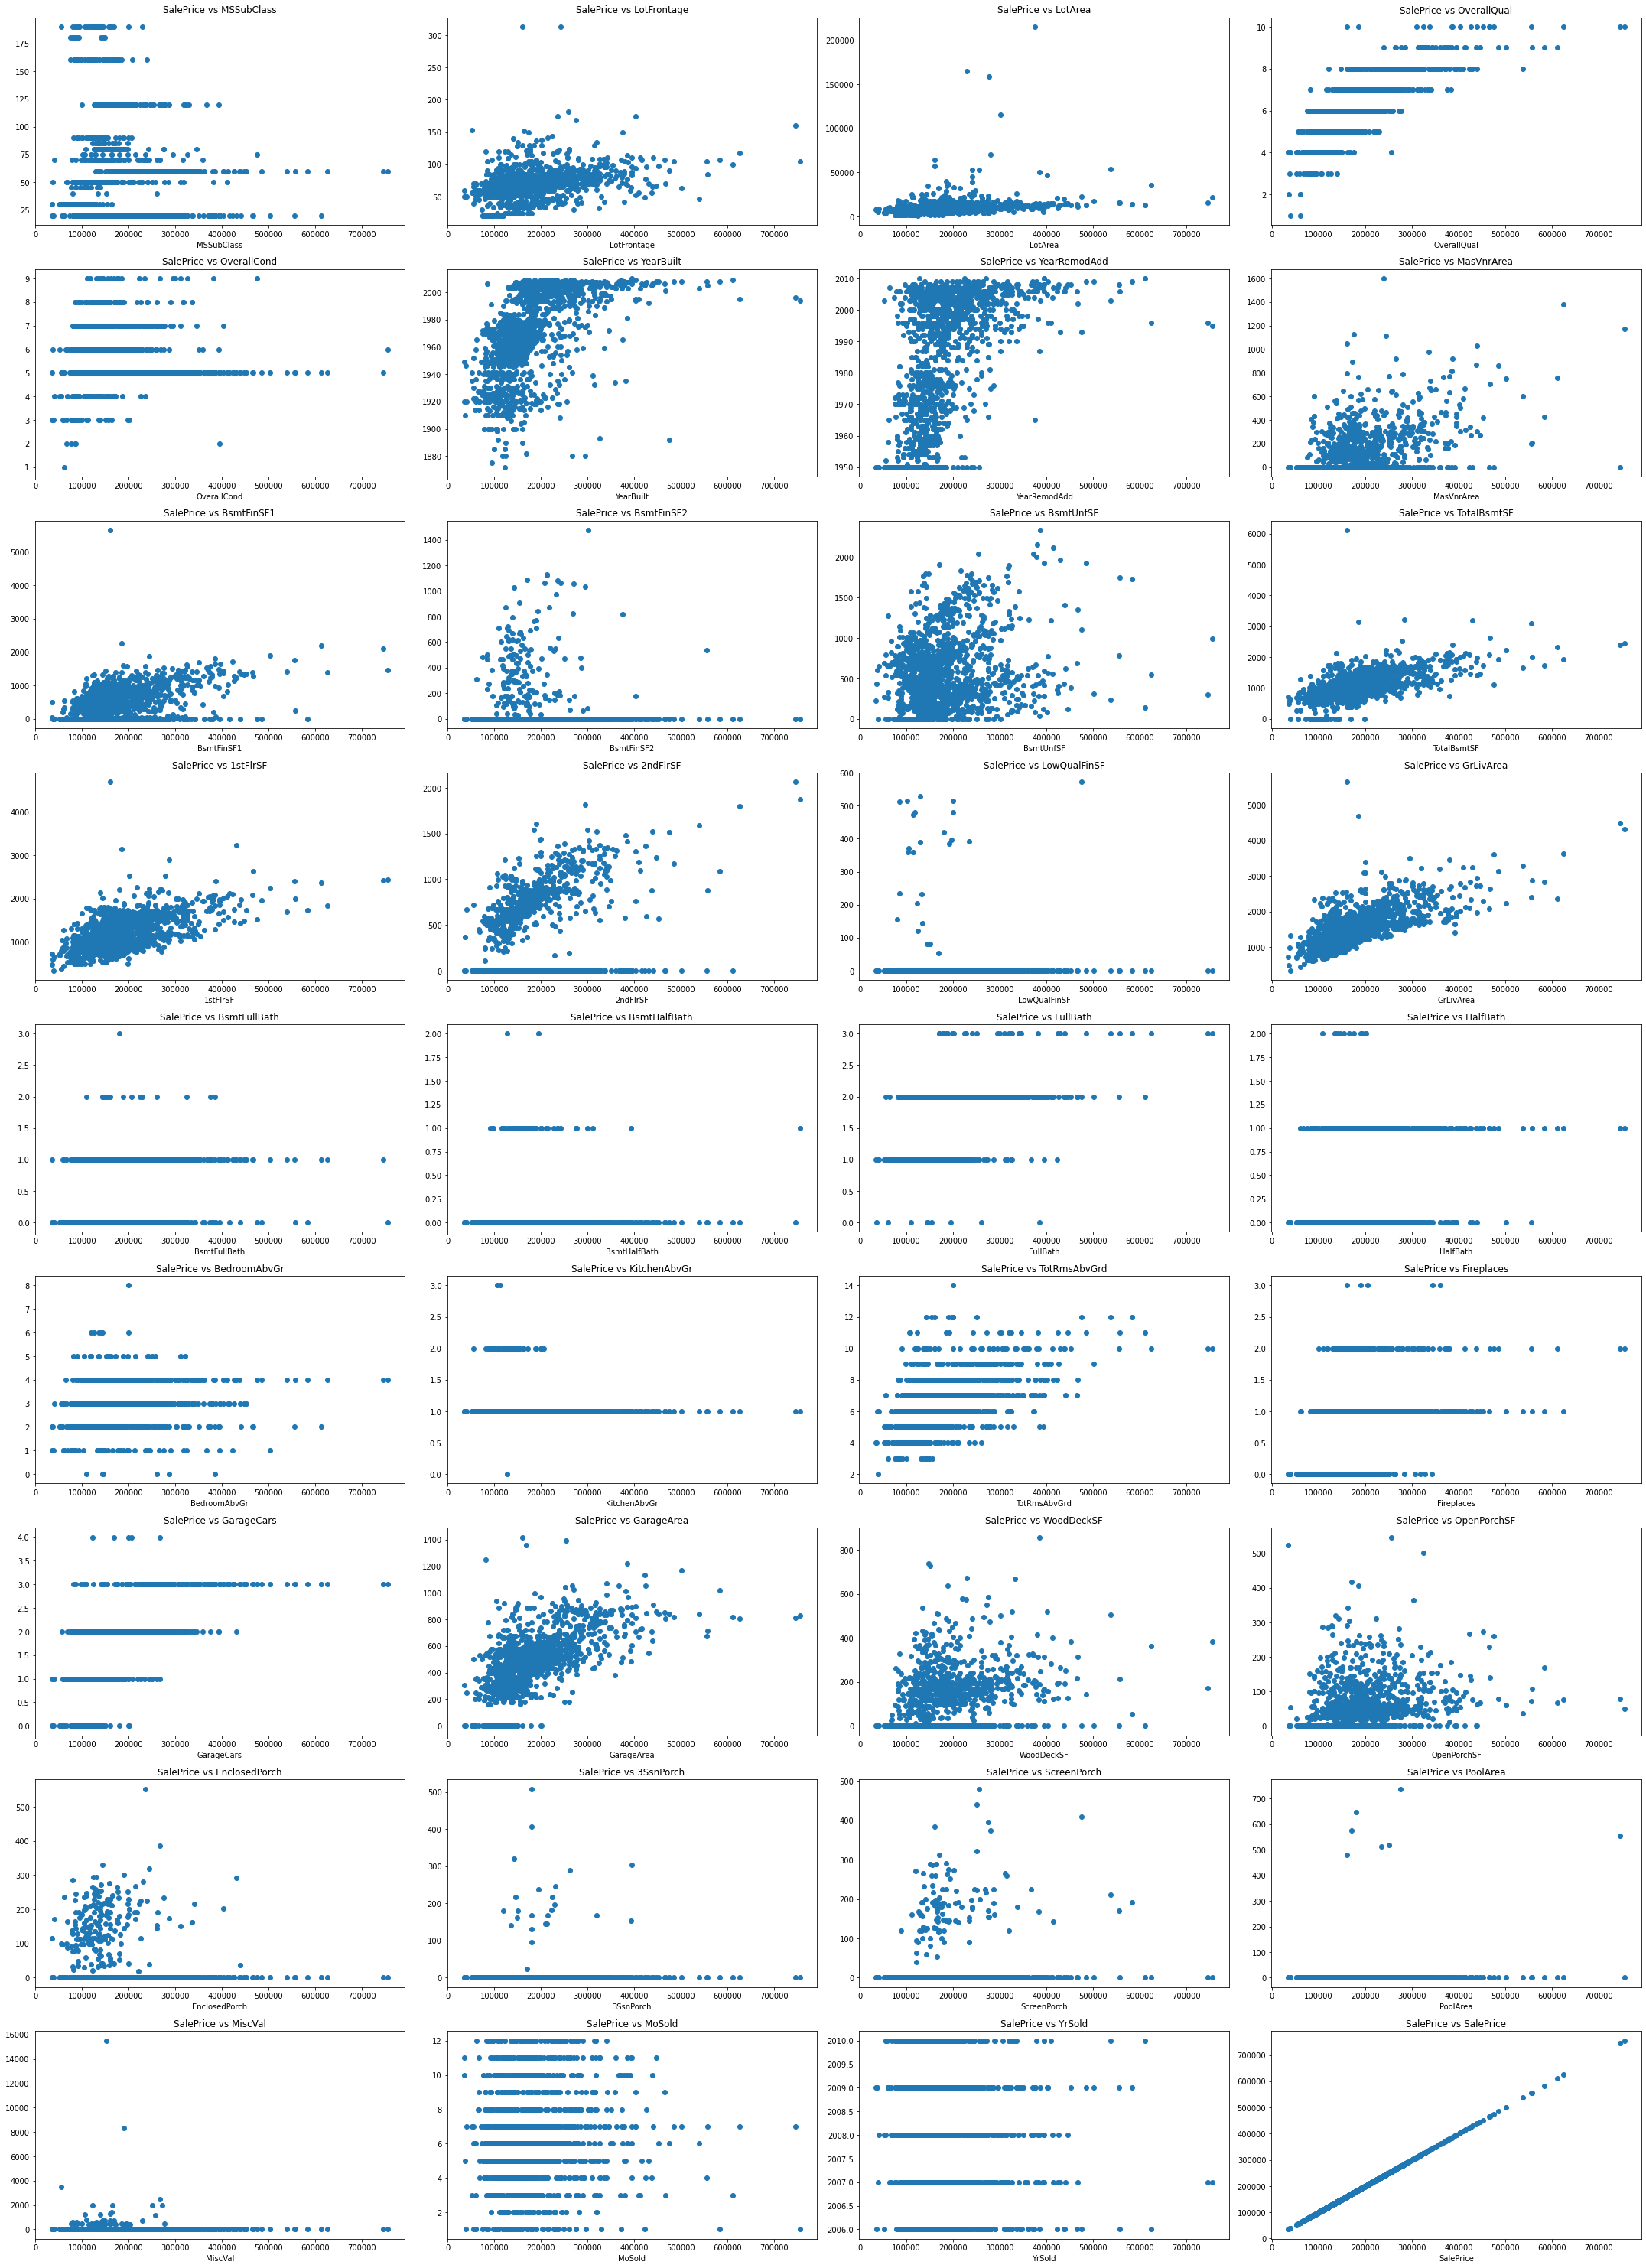

In [ ]:
# Multivariate analysis

# Bivariate analysis of two continuous variables

# Plot scatter plots to look at the relationship between the target variable 
# and the continuous variables (if the first variable's value usually goes up 
# when the second one goes up, then this indicates a positive relationship.)

plt.figure(figsize=(30,50))

for index, column in enumerate(numeric_columns):
    plt.subplot(11,4,index+1)
    plt.scatter(df["SalePrice"], df[column])
    plt.title("SalePrice vs {}".format(column))
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

OverallQual, 1stFlrSF, TotalBsmtSF, GrLivArea and GarageArea show a positive relationship with SalePrice. 

In [ ]:
# Apply the correlation coefficient to the continuous variables

# Get correlation matrix

df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


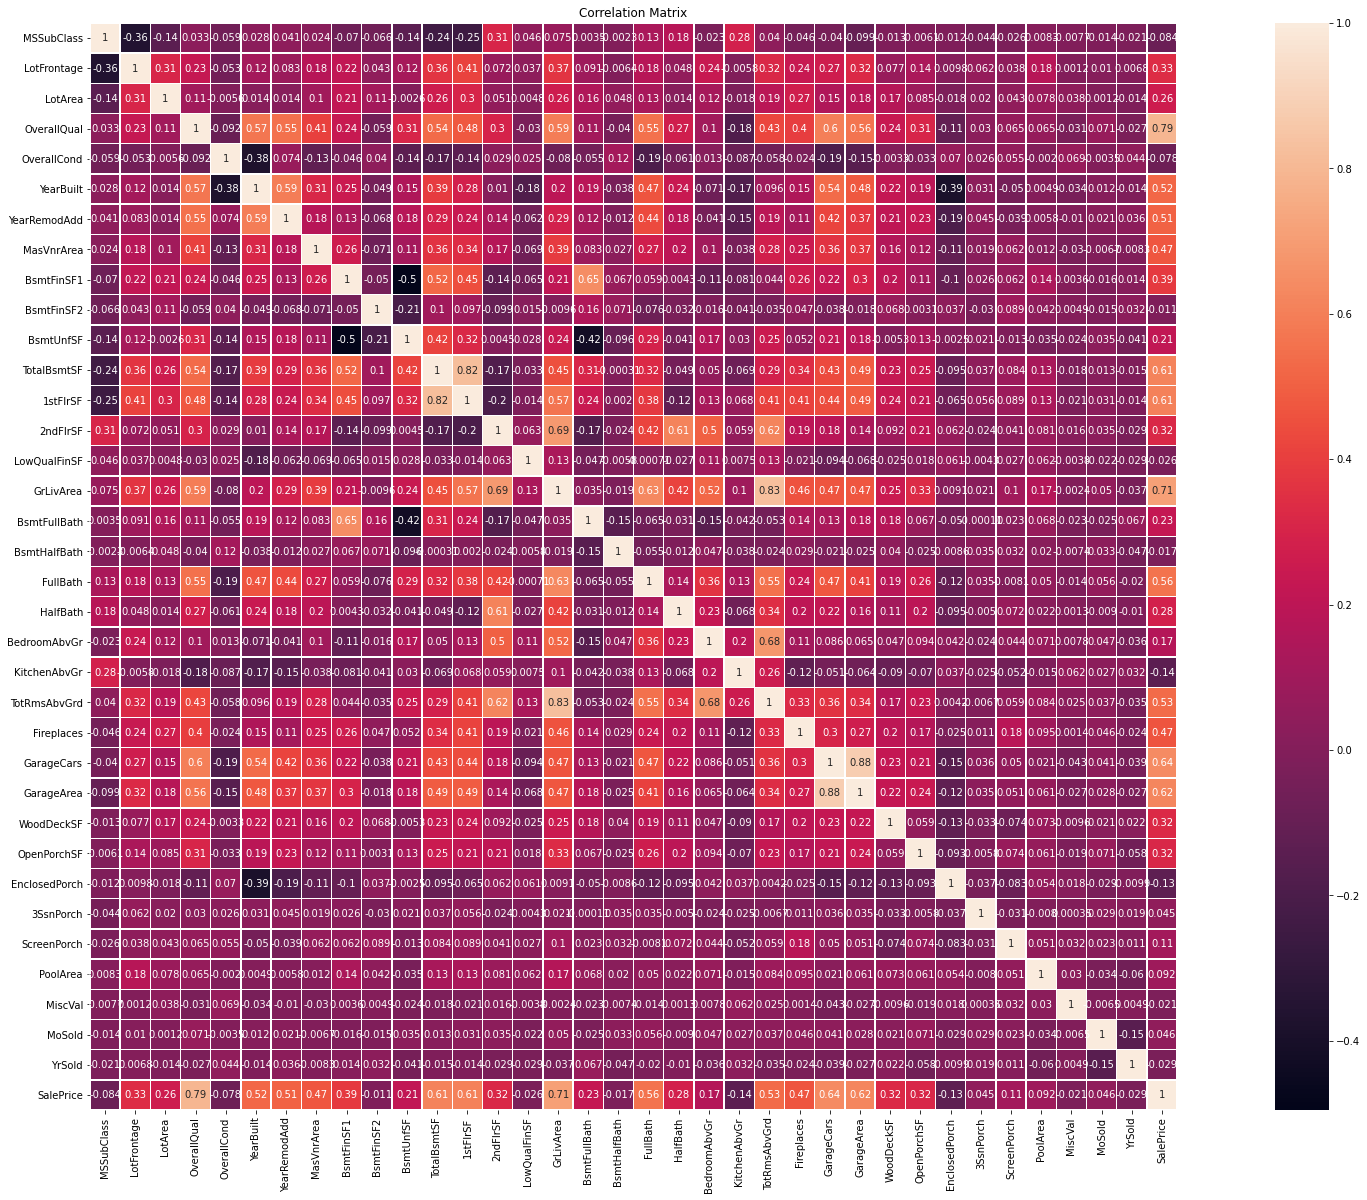

In [ ]:
# Draw heat map to look at the correlations between continuous variables

corrmat_df = df.corr()

import seaborn as sns

plt.figure(figsize=(35,20))

sns.heatmap(corrmat_df, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
np.abs(df[numeric_columns].iloc[:,1:].corr().loc[:,"SalePrice"]).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

The following are the 10 most correlated variables with SalePrice: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt and YearRemodAdd.  

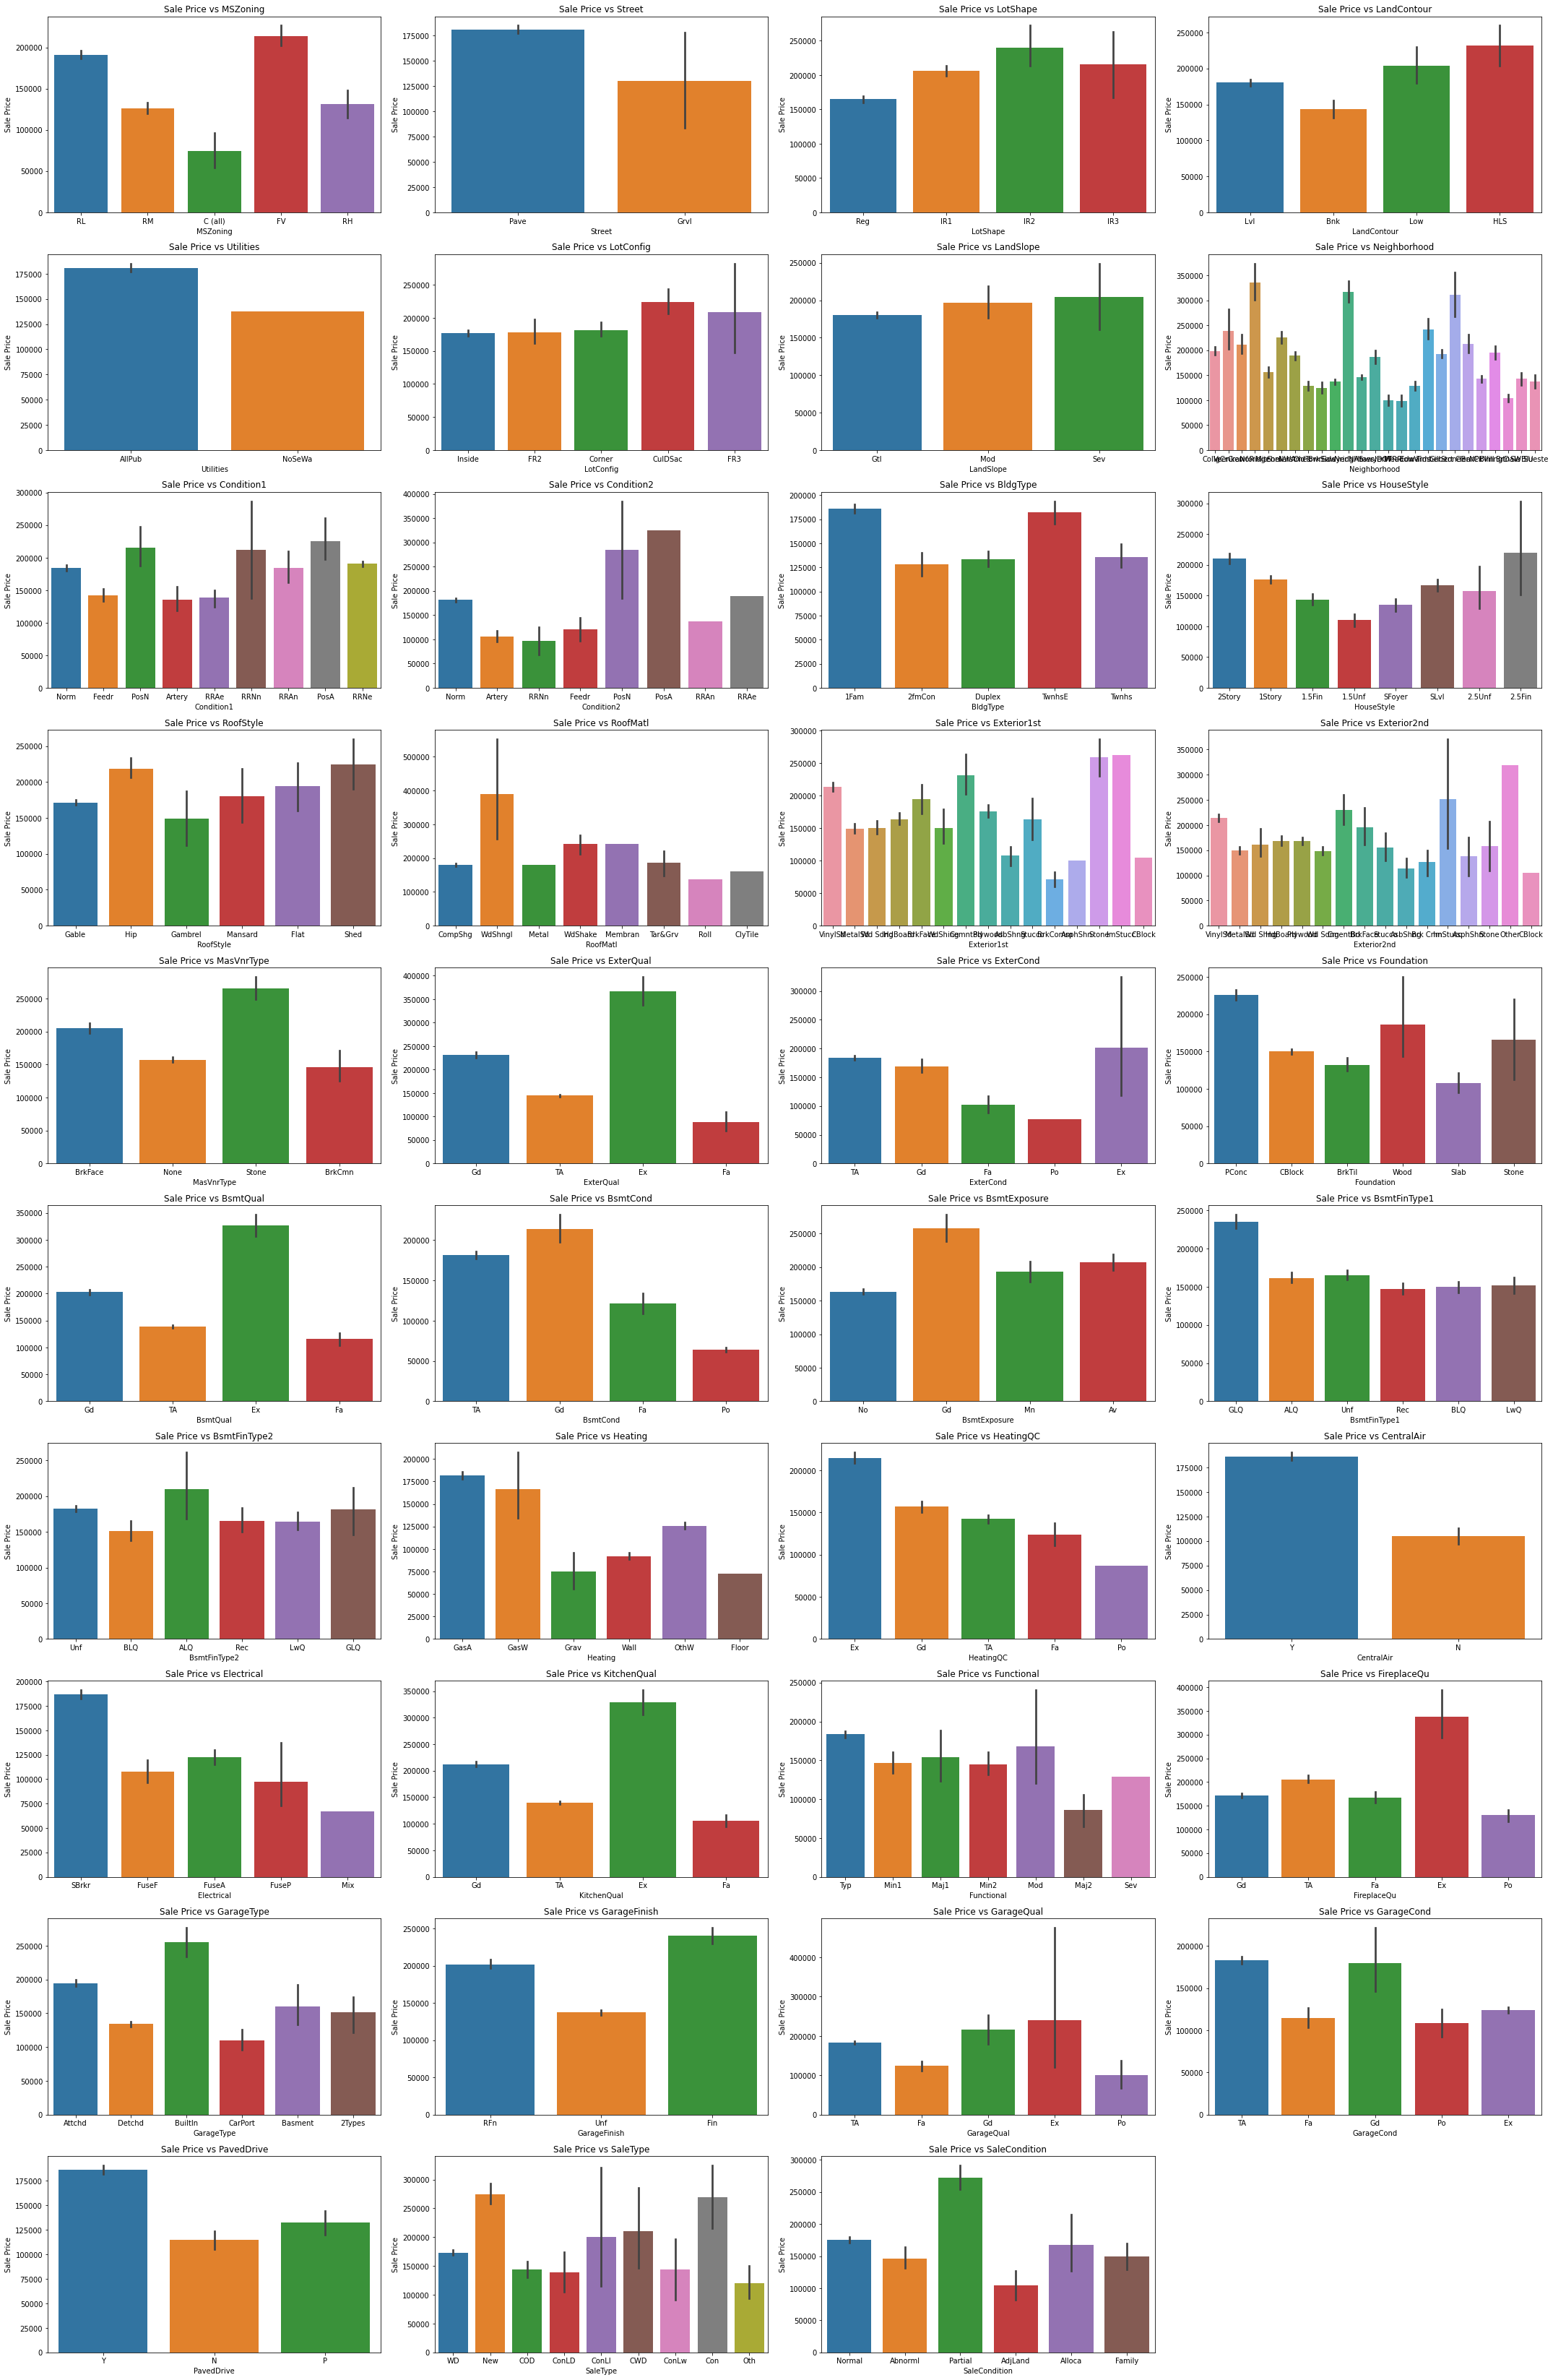

In [ ]:
# Visualize the target variable and categorical variables pairs

plt.figure(figsize=(30,50))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)

    sns.barplot(df[column], df["SalePrice"])
    plt.title("Sale Price vs {}".format(column))
    plt.ylabel("Sale Price")
    plt.xlabel(column)
    #plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

I will apply the ANOVA test to determine whether the categorical variables have some variance with respect to Sale Price.

In this case, the null hypothesis states that the features do not have a high difference/importance among each other while contributing the Sale Price. Thus, I will calculate the test statistic and p-value of each feature, and If we get a p-value less than 0.05 I will reject the null hypothesis.


In [ ]:
non_numeric_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
import scipy.stats

anova = {"feature":[], "f":[], "p":[]}

for i in non_numeric_columns:
  group_prices = []
  for group in df[i].unique():
      group_prices.append(df[df[i] == group]["SalePrice"].values)
  f, p = scipy.stats.f_oneway(*group_prices)
  anova["feature"].append(i)
  anova["f"].append(f)
  anova["p"].append(p)

anova = pd.DataFrame(anova)
anova = anova[["feature", "f", "p"]]
anova.sort_values("p", inplace=True)

anova


,feature,f,p
7,Neighborhood,71.784865,1.558600e-225
17,ExterQual,443.334831,1.439551e-204
20,BsmtQual,413.945648,2.078120e-194
29,KitchenQual,407.806352,3.032213e-192
33,GarageFinish,303.619407,5.993319e-111
19,Foundation,100.253851,5.791895e-91
26,HeatingQC,88.394462,2.667062e-67
23,BsmtFinType1,70.518425,3.598398e-66
16,MasVnrType,108.911305,1.279704e-63
32,GarageType,59.312957,2.578443e-56


The p-values of Street, LandSlope and Utilities are greater than 0.05; while the rest of the categorical variables have p-values less than 0.05 which means that these variables have some significance (variance) with respect to the Sale Price and the null hypothesis can be rejected.

###**Feature engineering**

In this final step of Exploratory Data Analysis (EDA), I will select the most useful features or create new features from the existing ones.

I will choose the 10 numerical variables that are most correlated with the Sale Price: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt and YearRemodAdd.

Furthermore, I will select the 10 categorical features that exhibit high variance with respect to the Sale Price: Neighborhood, ExterQual, BsmtQual, KitchenQual, GarageFinish, Foundation, HeatingQC, BsmtFinType1, MasVnrType, GarageType.  


In [ ]:
df_1 = df[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", 
           "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "SalePrice", 
           "Neighborhood", "ExterQual", "BsmtQual", "KitchenQual", "GarageFinish", 
           "Foundation", "HeatingQC", "BsmtFinType1", "MasVnrType", "GarageType"]]

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   GrLivArea     1460 non-null   int64 
 2   GarageCars    1460 non-null   int64 
 3   GarageArea    1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   FullBath      1460 non-null   int64 
 7   TotRmsAbvGrd  1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   YearRemodAdd  1460 non-null   int64 
 10  SalePrice     1460 non-null   int64 
 11  Neighborhood  1460 non-null   object
 12  ExterQual     1460 non-null   object
 13  BsmtQual      1460 non-null   object
 14  KitchenQual   1460 non-null   object
 15  GarageFinish  1460 non-null   object
 16  Foundation    1460 non-null   object
 17  HeatingQC     1460 non-null   object
 18  BsmtFinType1  1460 non-null   object
 19  MasVnr

In [ ]:
df_1.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,Neighborhood,ExterQual,BsmtQual,KitchenQual,GarageFinish,Foundation,HeatingQC,BsmtFinType1,MasVnrType,GarageType
0,7,1710,2,548,856,856,2,8,2003,2003,208500,CollgCr,Gd,Gd,Gd,RFn,PConc,Ex,GLQ,BrkFace,Attchd
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500,Veenker,TA,Gd,TA,RFn,CBlock,Ex,ALQ,None,Attchd
2,7,1786,2,608,920,920,2,6,2001,2002,223500,CollgCr,Gd,Gd,Gd,RFn,PConc,Ex,GLQ,BrkFace,Attchd
3,7,1717,3,642,756,961,1,7,1915,1970,140000,Crawfor,TA,TA,Gd,Unf,BrkTil,Gd,ALQ,None,Detchd
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000,NoRidge,Gd,Gd,Gd,RFn,PConc,Ex,GLQ,BrkFace,Attchd


In [ ]:
# Identify numerical variables in the dataset

numeric_data = df_1.select_dtypes(['int64', 'float64']).columns
print(numeric_data)
print("The number of numerical columns is {}".format(len(numeric_data)))

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'SalePrice'],
      dtype='object')
The number of numerical columns is 11


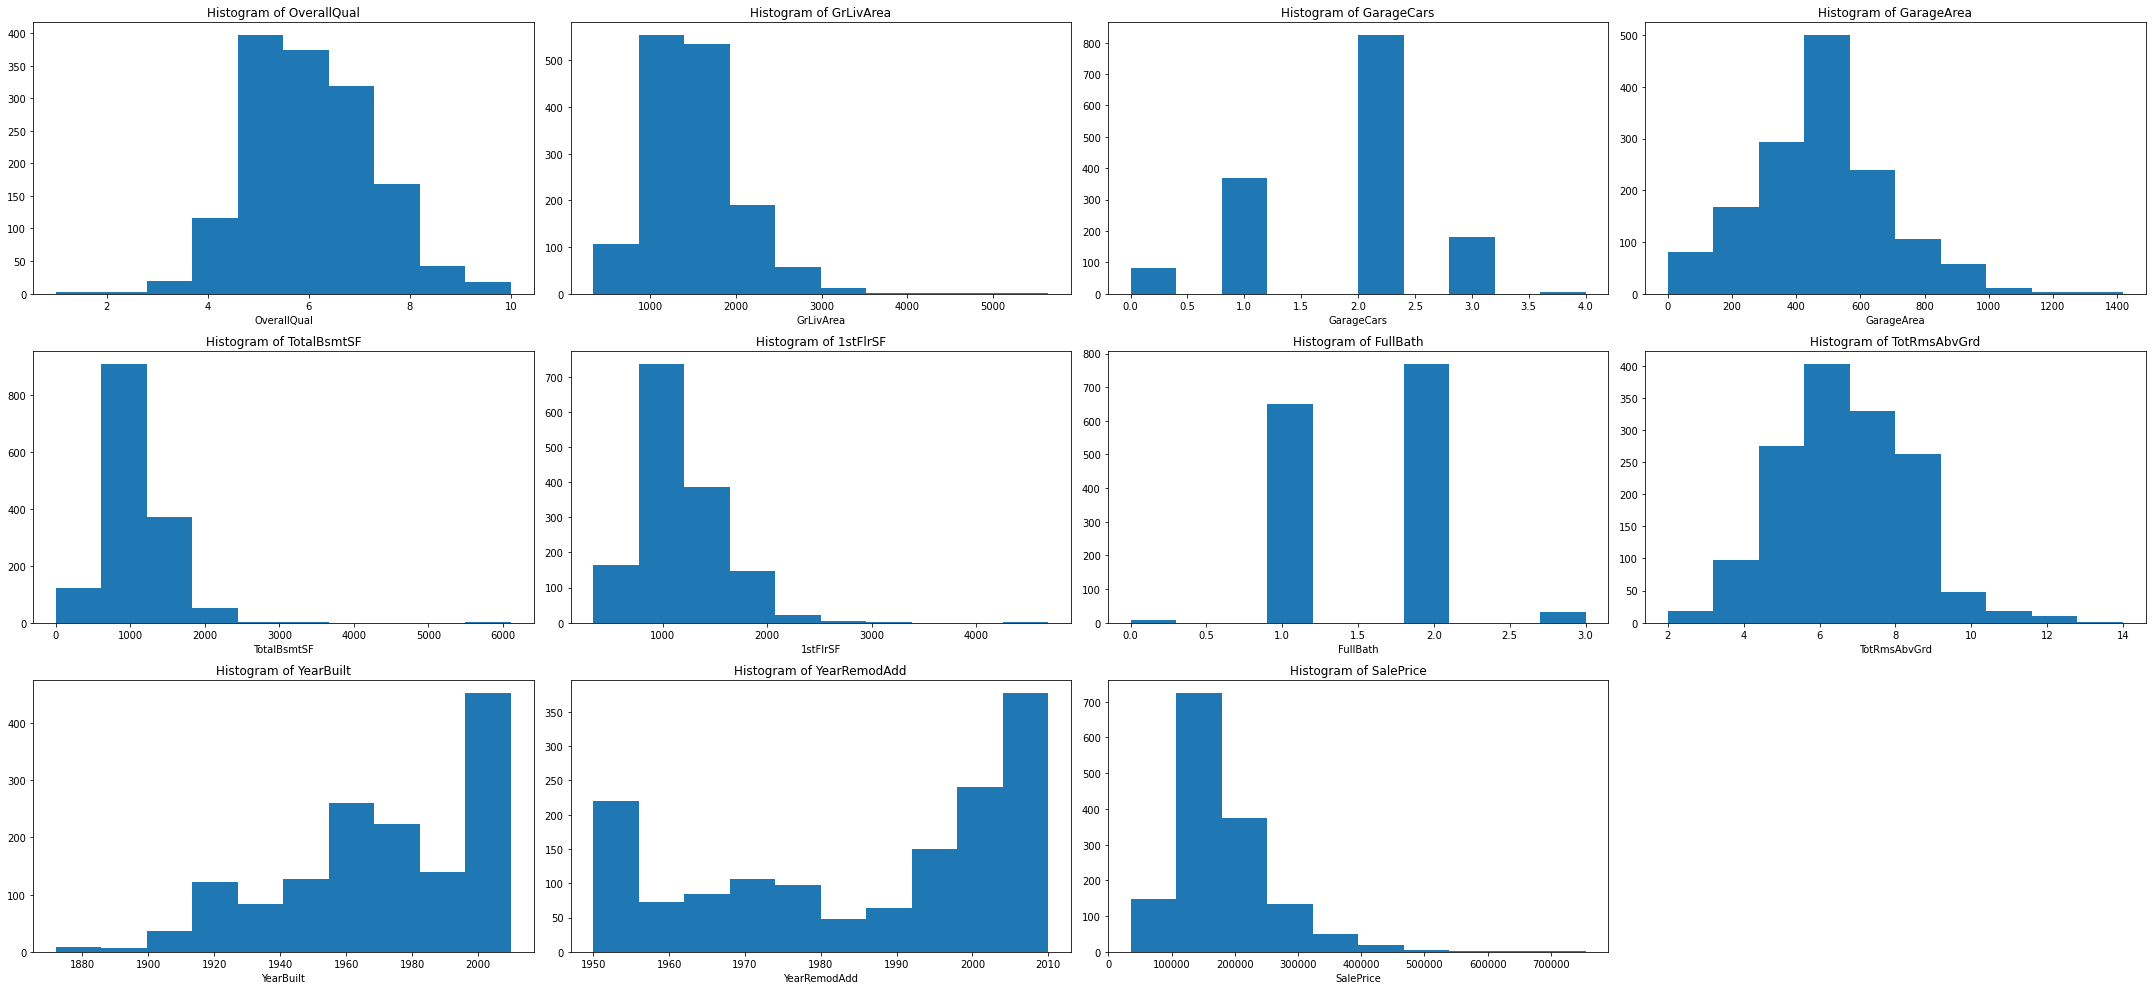

In [ ]:
# Univariate visualization of the continuous variables 
# to get a sense of their distribution

plt.figure(figsize=(30,50))

for index, column in enumerate(numeric_data):
    plt.subplot(11,4,index+1)
    plt.hist(df_1[column])
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

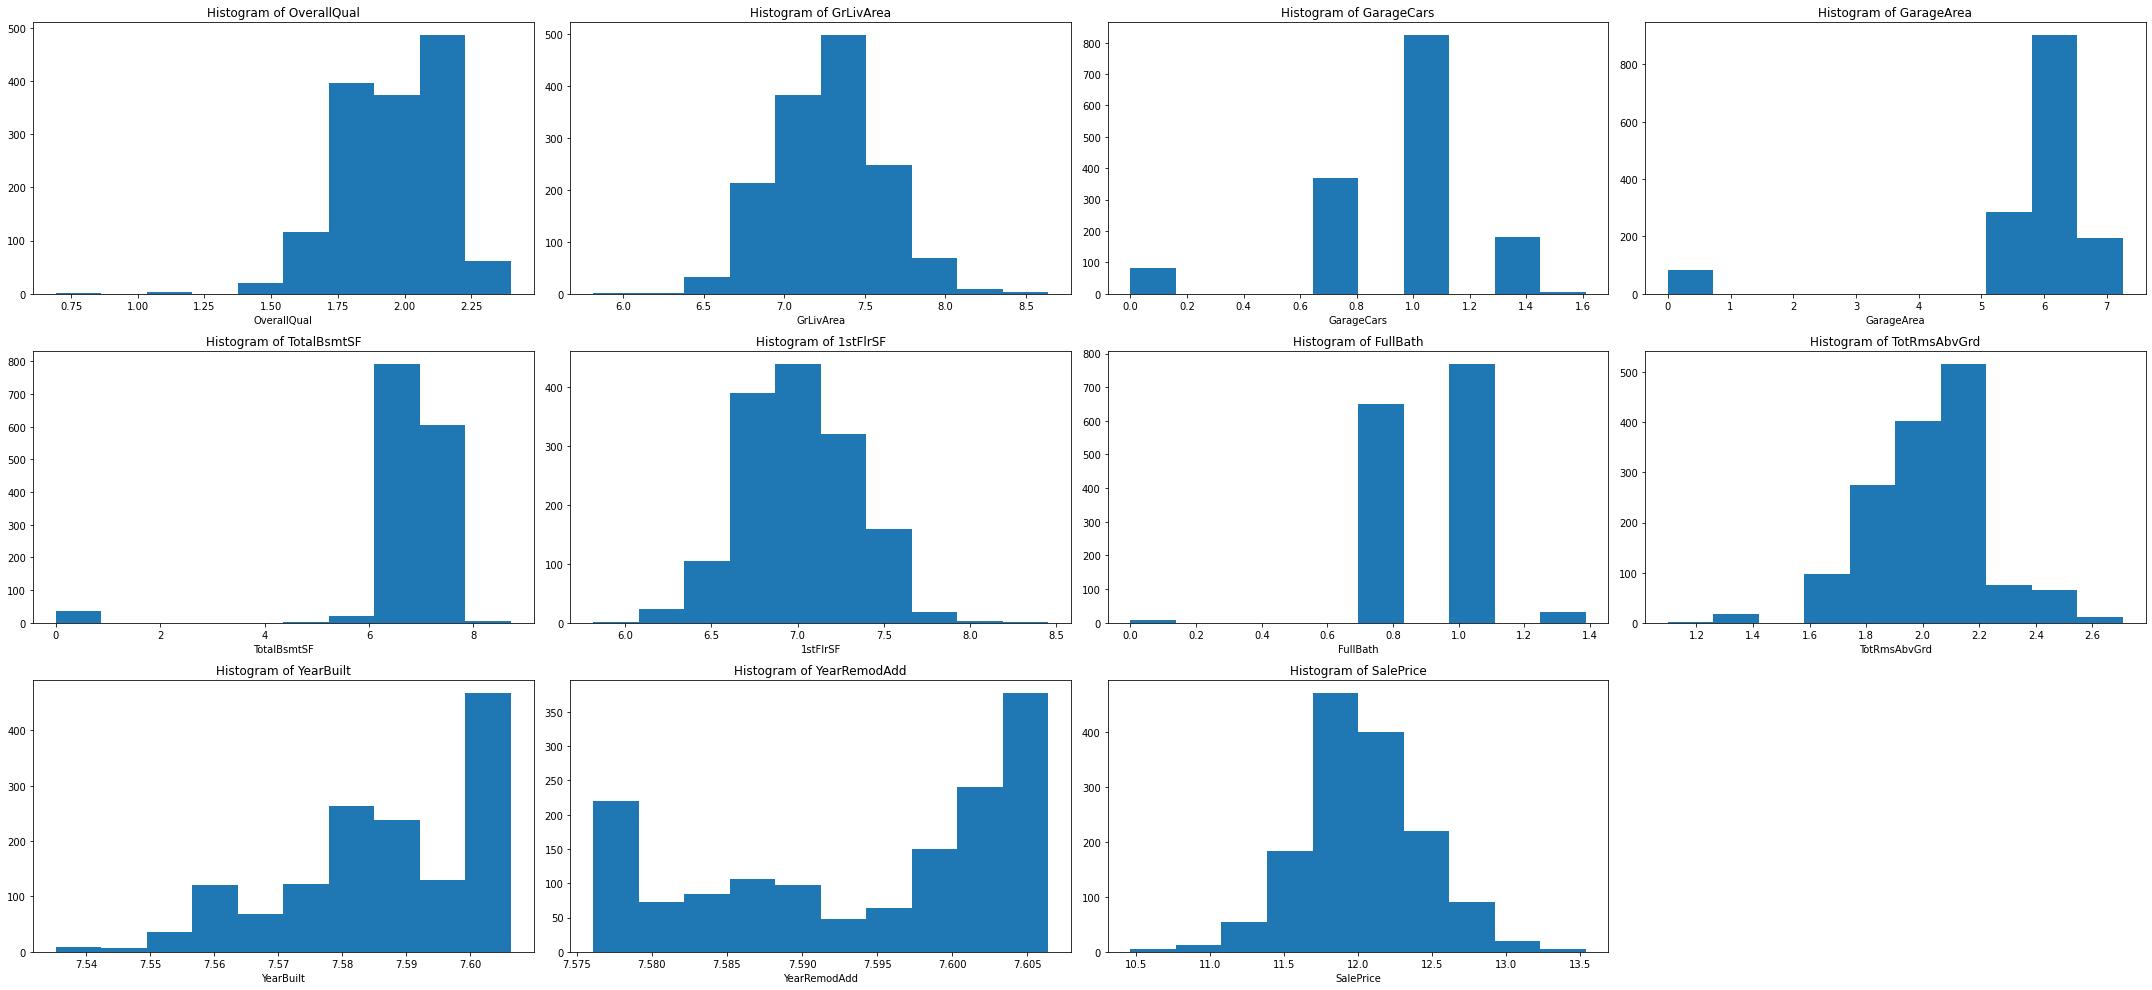

In [ ]:
# Log transformation of numerical variables and target variable

plt.figure(figsize=(30,50))

for index, column in enumerate(numeric_data):
    plt.subplot(11,4,index+1)
    plt.hist(np.log1p(df_1[column]))
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

In [ ]:
# One-hot encoding

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [ ]:
final_df = df_1.copy()

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   GrLivArea     1460 non-null   int64 
 2   GarageCars    1460 non-null   int64 
 3   GarageArea    1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   FullBath      1460 non-null   int64 
 7   TotRmsAbvGrd  1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   YearRemodAdd  1460 non-null   int64 
 10  SalePrice     1460 non-null   int64 
 11  Neighborhood  1460 non-null   object
 12  ExterQual     1460 non-null   object
 13  BsmtQual      1460 non-null   object
 14  KitchenQual   1460 non-null   object
 15  GarageFinish  1460 non-null   object
 16  Foundation    1460 non-null   object
 17  HeatingQC     1460 non-null   object
 18  BsmtFinType1  1460 non-null   object
 19  MasVnr

In [ ]:
non_numeric_columns_1 = df_1.select_dtypes(['object']).columns

# Convert text values to dummy variables

final_df = category_onehot_multcols(non_numeric_columns_1)

print(final_df.shape)

Neighborhood
ExterQual
BsmtQual
KitchenQual
GarageFinish
Foundation
HeatingQC
BsmtFinType1
MasVnrType
GarageType
(1460, 68)


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   GarageCars    1460 non-null   int64
 3   GarageArea    1460 non-null   int64
 4   TotalBsmtSF   1460 non-null   int64
 5   1stFlrSF      1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   YearBuilt     1460 non-null   int64
 9   YearRemodAdd  1460 non-null   int64
 10  SalePrice     1460 non-null   int64
 11  Blueste       1460 non-null   uint8
 12  BrDale        1460 non-null   uint8
 13  BrkSide       1460 non-null   uint8
 14  ClearCr       1460 non-null   uint8
 15  CollgCr       1460 non-null   uint8
 16  Crawfor       1460 non-null   uint8
 17  Edwards       1460 non-null   uint8
 18  Gilbert       1460 non-null   uint8
 19  IDOTRR        1460 non-null

In [ ]:
final_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Fa,Gd,TA,Fa,Gd,TA,Fa,Gd,TA,RFn,Unf,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,Po,TA,BLQ,GLQ,LwQ,Rec,Unf,BrkFace,None,Stone,Attchd,Basment,BuiltIn,CarPort,Detchd
0,7,1710,2,548,856,856,2,8,2003,2003,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,7,1786,2,608,920,920,2,6,2001,2002,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,7,1717,3,642,756,961,1,7,1915,1970,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


### **Modelling**

I will apply several machine learning tecniques to predict Sale Price and select the best performing model.

Sale Price is the target variable. It's a continuous outcome variable since it can take on an infinite range of values, therefore, we are dealing with a regression problem.

**Ordinary Least Squares (OLS)**

In [ ]:
# Y is the target variable

Y = np.log1p(final_df['SalePrice'])

# X is the feature set

X = final_df.drop(["SalePrice"], axis=1)


# Split the data into train and test sets where 20% of the data 
# resides in the test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [ ]:
# Fit an OLS model using scikit-learn

lrm = LinearRegression()
lrm.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model in the training set is: 0.8729984499403014
-----Test set statistics-----
R-squared of the model in the test set is: 0.8694553454134542
Mean absolute error of the prediction is: 0.10819771526493938
Mean squared error of the prediction is: 0.020975457477751574
Root mean squared error of the prediction is: 0.14482906295958548
Mean absolute percentage error of the prediction is: 0.9007415498774634


It can be seen that the R-squared of the model in the training set is **0.8729**, whereas the R-squared is **0.8694** in the test set.

The R-squared value in the test set is **0.8694**. This means the model explains 86.94% of the variance in the target (Sale Price), leaving 13.06% unexplained.

**Ridge Regression**

I will use k-fold cross-validation to choose an optimal regularization parameter (checking which parameter gives the most consistent results across training and validation sets). 

In [ ]:
from sklearn.linear_model import Ridge

ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in the training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1.0
R-squared of the model in the training set is: 0.8725238641523956
-----Test set statistics-----
R-squared of the model in the test set is: 0.8703409303986376
Mean absolute error of the prediction is: 0.10785967327239661
Mean squared error of the prediction is: 0.020833164786729624
Root mean squared error of the prediction is: 0.1443369834336634
Mean absolute percentage error of the prediction is: 0.8979011996256234


The R-squared is **0.8725** for the training set and **0.8703** for the test set.

These values are higher than the previous model. The performance statistics on the test set (MAE, MSE, RMSE and MAPE) are lower than OLS; which means that Ridge Regression performs better than OLS.

In addition, the difference between the R-squared values of the training and test set is also the lower than OLS which means that Ridge Resgression reduced overfitting and performed better than OLS. 



**Lasso Regression**

In [ ]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in the training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in the training set is: 0.872245126692093
-----Test set statistics-----
R-squared of the model in the test set is: 0.8701394738697654
Mean absolute error of the prediction is: 0.10805652750194836
Mean squared error of the prediction is: 0.020865534115587704
Root mean squared error of the prediction is: 0.14444907100977736
Mean absolute percentage error of the prediction is: 0.8996101456554193


The R-squared of the model in the training and test sets are **0.8722** and **0.8701** respectively. 

Lasso Regression performs better than OLS and Ridge Regression. 

**Elastic Net Regression**

In [ ]:
elastic_cv = ElasticNetCV(alphas=alphas, cv=5)
elastic_cv.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = elastic_cv.predict(X_train)
y_preds_test = elastic_cv.predict(X_test)

print("Best alpha value is: {}".format(elastic_cv.alpha_))
print("R-squared of the model in the training set is: {}".format(elastic_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(elastic_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in the training set is: 0.8726928370353584
-----Test set statistics-----
R-squared of the model in the test set is: 0.8698487883390261
Mean absolute error of the prediction is: 0.10818981219255967
Mean squared error of the prediction is: 0.020912240447675583
Root mean squared error of the prediction is: 0.14461065122485128
Mean absolute percentage error of the prediction is: 0.9006977714018448


The R-squared is **0.8726** for the training set and **0.8698** for the test set.

According to the results, when comparing OLS, Ridge, Lasso and Elastic Net regression models; **Lasso Regression performed better** since the difference between the R-squared values of the training and test set is minimized. In addition, Lasso's test set performances (MAE, MSE, RMSE and MAPE) are lower than OLS, Ridge and Elastic Net.

**Random Forest Regression**

In [ ]:
# Train the model

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = rfr.predict(X_train)
y_preds_test = rfr.predict(X_test)

print("R-squared of the model in the training set is: {}".format(rfr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(rfr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.9791943178454569
-----Test set statistics-----
R-squared of the model in the test set is: 0.8549723147223944
Mean absolute error of the prediction is: 0.11252908413015296
Mean squared error of the prediction is: 0.023302540079267773
Root mean squared error of the prediction is: 0.15265169530427028
Mean absolute percentage error of the prediction is: 0.9365667418423256


The R-squared of the model in the training and test sets are **0.9790** and **0.8597** respectively. However, the difference between the R-squared values of the training and test set is larger than the previous models. This means that Random Forest Regressions increased overfitting and performed worse than the previous models. Its R-squared value in the test set was also lower than the previous models. 

**Improving Random Forest Regression**

In [ ]:
# Train the model

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=250, criterion="mse", max_depth=3, max_features=15)
rfr.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = rfr.predict(X_train)
y_preds_test = rfr.predict(X_test)

print("R-squared of the model in the training set is: {}".format(rfr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(rfr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.7769469927416462
-----Test set statistics-----
R-squared of the model in the test set is: 0.7679637778007153
Mean absolute error of the prediction is: 0.13540131718308987
Mean squared error of the prediction is: 0.037282766785464556
Root mean squared error of the prediction is: 0.1930874589026034
Mean absolute percentage error of the prediction is: 1.1227416760673286


In [ ]:
# Train the model

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, criterion="mse", max_depth=4, max_features=15)
rfr.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = rfr.predict(X_train)
y_preds_test = rfr.predict(X_test)

print("R-squared of the model in the training set is: {}".format(rfr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(rfr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.8247782272504285
-----Test set statistics-----
R-squared of the model in the test set is: 0.8092795659748271
Mean absolute error of the prediction is: 0.12498143584386089
Mean squared error of the prediction is: 0.03064429077317145
Root mean squared error of the prediction is: 0.17505510781799957
Mean absolute percentage error of the prediction is: 1.0360486965162303


After updating the parameters; the difference between the R-squared values of the training and test sets was minimized which means that overfitting was reduced. Although we were able to improve the initial Random Forest Regression model; **Lasso Regression outperformed Random Forest Regression** according to the results.    

**Gradient Boosting Regression**

In [ ]:
# Train the model

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=50, max_depth=4, min_samples_split=5, learning_rate=0.1, loss="ls", subsample=1.0)
gbr.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = gbr.predict(X_train)
y_preds_test = gbr.predict(X_test)

print("R-squared of the model in the training set is: {}".format(gbr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(gbr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.9407684433075884
-----Test set statistics-----
R-squared of the model in the test set is: 0.8698447314590082
Mean absolute error of the prediction is: 0.10465645964881053
Mean squared error of the prediction is: 0.020912892292935595
Root mean squared error of the prediction is: 0.14461290500137114
Mean absolute percentage error of the prediction is: 0.869358644536192


The R-squared of the model in the training and test sets are **0.9407** and **0.8668** respectively. However, this Gradient Boosting Regression model overfits since the difference between R-squred values is large. 

**Improving Gradient Boosting Regressor**

In [ ]:
# Train the model

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=50, max_depth=3, min_samples_split=5, learning_rate=0.05, loss="huber", subsample=1.0)
gbr.fit(X_train, y_train)

# Make predictions by calling the predict() function

y_preds_train = gbr.predict(X_train)
y_preds_test = gbr.predict(X_test)

print("R-squared of the model in the training set is: {}".format(gbr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(gbr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.8558499735353917
-----Test set statistics-----
R-squared of the model in the test set is: 0.8298867988958558
Mean absolute error of the prediction is: 0.11466020532255311
Mean squared error of the prediction is: 0.027333192825590602
Root mean squared error of the prediction is: 0.16532753196485636
Mean absolute percentage error of the prediction is: 0.9499576967976215


The Gradient Boosting Regression model could be improved; however, according to the results, Random Forest Regression performed better than Gradient Boosting; and Lasso Regression outperformed both Random Forest and Gradient Boosting. 

**ANN**

In [ ]:
# Y is the target variable

Y = np.log1p(final_df['SalePrice'])

# X is the feature set

X = final_df.drop(["SalePrice"], axis=1)

from sklearn.preprocessing import StandardScaler

# Standarizing the features

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.2, random_state = 465)

In [ ]:
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)

x_train shape: (1168, 67) y_train shape: (1168,)


In [ ]:
# Implement ANN model

model = Sequential()

# The first dense layer

model.add(Dense(128, input_dim=67, activation="relu"))
          
# The second dense layer

model.add(Dense(64, activation="relu"))

# The third dense layer

model.add(Dense(32, activation="relu"))

# The last layer is the output layer

model.add(Dense(1, activation="softmax"))


# Compile the model

import keras
import tensorflow as tf

model.compile(optimizer="sgd", loss="mse", metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsolutePercentageError() ])


# Train model

# Setting `verbose=1` prints out some results after each epoch

model.fit(X_train, y_train, batch_size=8, epochs=30, verbose=1)

Epoch 1/30
146/146 [==============================] - 1s 1ms/step - loss: 121.6987 - mean_absolute_error: 11.0245 - mean_squared_error: 121.6987 - root_mean_squared_error: 11.0317 - mean_absolute_percentage_error: 91.6745
Epoch 2/30
146/146 [==============================] - 0s 1ms/step - loss: 121.6619 - mean_absolute_error: 11.0229 - mean_squared_error: 121.6619 - root_mean_squared_error: 11.0300 - mean_absolute_percentage_error: 91.6735
Epoch 3/30
146/146 [==============================] - 0s 1ms/step - loss: 121.4169 - mean_absolute_error: 11.0114 - mean_squared_error: 121.4169 - root_mean_squared_error: 11.0189 - mean_absolute_percentage_error: 91.6651
Epoch 4/30
146/146 [==============================] - 0s 1ms/step - loss: 121.6892 - mean_absolute_error: 11.0240 - mean_squared_error: 121.6892 - root_mean_squared_error: 11.0313 - mean_absolute_percentage_error: 91.6741
Epoch 5/30
146/146 [==============================] - 0s 1ms/step - loss: 121.4925 - mean_absolute_error: 11.014

In [ ]:
# Evaluate model

from sklearn.metrics import r2_score

y_preds_test
print(r2_score(y_test, y_preds))

score = model.evaluate(X_test, y_test, verbose=0)
#print('Test score:', score[0])
print('Mean absolute error of the prediction is:', score[1])
print('Mean squared error of the prediction is:', score[2])
print('Root mean squared error of the prediction is:', score[3])
print('Mean absolute percentage error of the prediction is:', score[4])

Mean absolute error of the prediction is: 11.03743839263916
Mean squared error of the prediction is: 121.98572540283203
Root mean squared error of the prediction is: 11.04471492767334
Mean absolute percentage error of the prediction is: 91.68343353271484


The performance statistics on the test set (MAE, MSE, RMSE and MAPE) of the ANN solution are higher than all the previous models. Therefore, ANN might not be practical on this analysis since deep learning models require a lot of data to train on. 

---

#**4. Results**

The R-squared test set value of the Lasso Regression solution is by far the highest among the models applied. The R-squared value is **0.8701** which means the model explains 87.01% of the variance in the target (Sale Price), leaving 12.99% unexplained. 

In addition, Lasso Regression outperformed the ANN model solution. 

As a result, Lasso Regression is the top performer since it predicts Sale Price better than the other models.


---

# **5. Discussion & Recomendations**

From this model, interested parties will be able to compare the sale price of a house with the appraiser’s estimation to avoid cancelled sales contract and transaction delays.

The model’s sale price value is based on comparable homes in the area since the increase or decrease in price is largely based on how a house compares to others in an area. Therefore, the model’s prediction is expected to be better than the appraisers. If interested parties notice large inconsistencies between both the model and appraiser estimations; they should bring them to the attention of the real estate agent and mortgage lender.

Moreover, this model could serve as concrete evidence that the appraisal is wrong. Without a solid case, lenders will not be likely to help. However, with concrete factual backup, a lender may be able to order a new appraisal, and may even have the ability to override the first home appraisal report.

After all, an appraisal is just the appraiser’s opinion; and this model could serve as a second appraiser or opinion for comparison purposes.

House prices can be affected by economic activity. Thus, as further analysis, it is recommended to measure and integrate the interest rates in the prediction at the time houses are sold. 


---

# **References**

1. https://cdn.nar.realtor/sites/default/files/documents/2020-10-realtors-confidence-index-11-19-2020.pdf

2. https://www.nar.realtor/
